In [35]:
import numpy as np
from numpy import pi
from scipy import linalg as lg
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

%matplotlib inline

## Pulse train

In [36]:
def cos_harmonics(x,w_0,n):
    return np.cos(n*w_0*x)
def coef_pulse(A,n,t_p,T):
    if n==0:
        return A*t_p/T
    return 2*(A/(n*pi))*np.sin(n*pi*t_p/T)

In [37]:
N = 400
x = np.linspace(-10,10,N)
w_0=1.
A=1.
T=2.
t_p=T/2.

In [38]:
fourier_components=np.array([cos_harmonics(x,w_0,n)*coef_pulse(A,n,t_p,T) for n in range(0,30)])

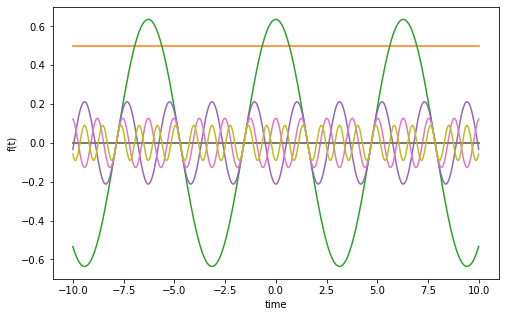

In [42]:
fig,ax = plt.subplots(figsize=(8,5))
for i in range(8):
    ax.plot(x,fourier_components[i],color=f"C{i+1}")
ax.set_xlabel("time")
ax.set_ylabel("f(t)",color='k')
plt.show()


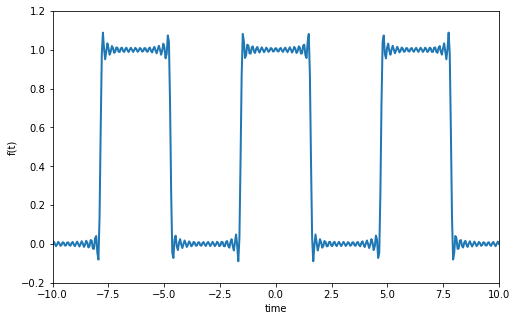

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xlabel("time")
ax.set_ylabel("f(t)",color='k')
# plt.show()

line, = ax.plot(x,np.cumsum(fourier_components,axis=0)[29],lw=2)
ax.set_xlim(-10,10)
ax.set_ylim(-0.2,1.2)
ax.margins(0,0.1)
def animate(i):
    line.set_data(x,np.cumsum(fourier_components,axis=0)[i])

ani = animation.FuncAnimation(fig, animate, frames=30)
HTML(ani.to_jshtml())

## Wave packet 

In [30]:
def plane_wave(x,w):
    return np.exp(1j*w*x)
def fourier_trans(w,a):
    return np.sqrt(pi/a)*np.exp(-pi**2*w**2/a)

In [31]:
Nx= 500
x = np.linspace(-20,20,Nx)
N = 1000       # number of discrete points on the spatial grid
w = np.linspace(-30,30,N)
dw = w[1]-w[0]
a=5

In [32]:
integral_components=np.array([plane_wave(x,w[n])*fourier_trans(w[n],a)*dw for n in range(0,N)])

In [33]:
result=np.sum(integral_components,axis=0)

/usr/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


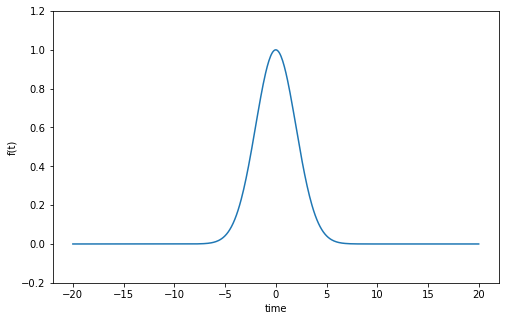

In [29]:
fig,ax = plt.subplots(figsize=(8,5))
#ax.plot(x,integral_components[500]/dw)
ax.plot(x,result)
ax.set_xlabel("time")
ax.set_ylabel("f(t)",color='k')
ax.set_ylim(-0.2,1.2)
plt.show()